# Выбор локации для скважины



Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Описание проекта: 

Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны.Нужно построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируем возможную прибыль и риски техникой Bootstrap.


## Цели задачи:
#### а) Предсказать наиболее прибыльные скважины для добычи нефти. Задача регрессии

#### б) Расчитать прибыль и оценить риски

## Данные

**1) Данные, которыми мы располагаем:**

* /datasets/geo_data_0.csv. 

* /datasets/geo_data_1.csv. 

* /datasets/geo_data_2.csv

**2)Описание данных**
* id — уникальный идентификатор скважины;

* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

* product — объём запасов в скважине (тыс. баррелей).

## План выполнения проекта

* Загрузить и подготовить данные.

* Обучить и проверить модель для каждого региона: линейная регрессия

* Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

* Посчитайте риски и прибыль для каждого региона



## Загрузка и подготовка данных

In [1]:
!pip install --upgrade scikit-learn -q
!pip install phik -q
!pip install imbalanced-learn -q
!pip install optuna -q 
!pip install mlxtend -q
!pip install --upgrade shap matplotlib -q
!pip install --upgrade seaborn -q


In [2]:
import pandas as pd

import numpy as np

import matplotlib as plt

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split 

import scipy.stats as stats

from scipy import stats as st

from sklearn.metrics import (
    accuracy_score, 
    recall_score, 
    precision_score,  
    confusion_matrix,
    roc_auc_score,
    f1_score,mean_squared_error, 
    r2_score
)

import phik

from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder,   
    StandardScaler,  
    MinMaxScaler, 
    RobustScaler,
    LabelEncoder
                                  )
   


from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score

from numpy.random import RandomState

from scipy import stats as st


### Предобработка данных

In [3]:
geo_data_0=pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1=pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2=pd.read_csv('/datasets/geo_data_2.csv')



In [4]:
geo_data_0['id'] = geo_data_0['id'].str.lower()
geo_data_1['id'] = geo_data_1['id'].str.lower()
geo_data_2['id'] = geo_data_2['id'].str.lower()

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_0.duplicated().sum()



0

In [9]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [10]:
geo_data_1.duplicated().sum()


0

In [11]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
geo_data_2.duplicated().sum()

0

In [13]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

#### Вывод блока

* Данные во всех 3 df имеют корректный тип

* Я привел данные к нижнему регистру во всех df столбец 'id'. 

* В данных отсутствуют пропуски, дубликаты

### Исследовательский анализ данных

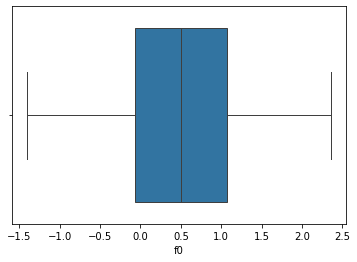

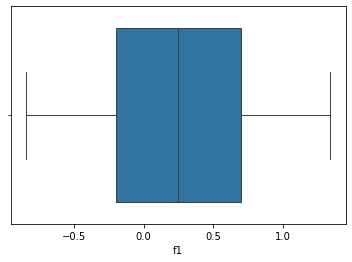

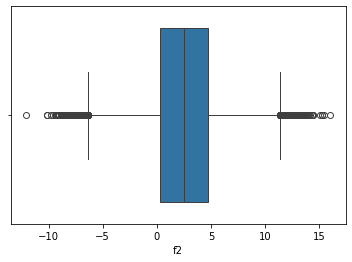

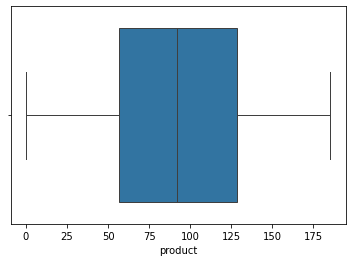

In [14]:
num_col_names =  ['f0','f1','f2','product']
for i in num_col_names:
    sns.boxplot(data=geo_data_0, x=i)
    plt.show()

In [15]:
geo_data_0 = geo_data_0.query('f2 > -12')


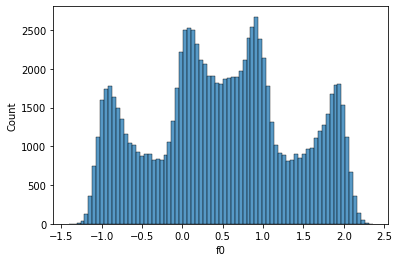

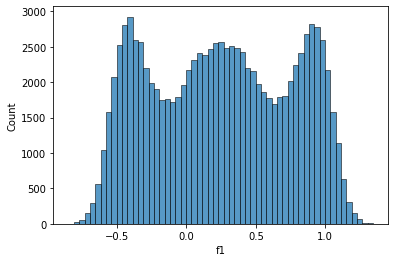

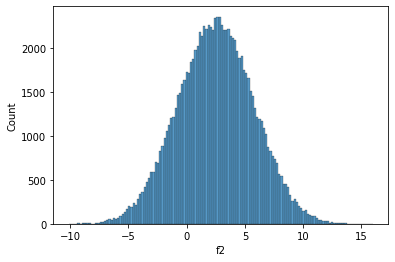

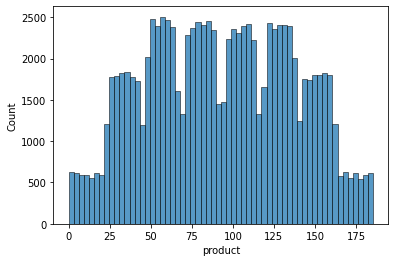

In [16]:
for i in num_col_names:
    sns.histplot(data=geo_data_0, x=i)
    plt.show()

**Промежуточный вывод блока:**

Данные в столбце 'f2' в df geo_data_0 имеют выброс. Я решил его удалить. Выбросы влияют на качество модели

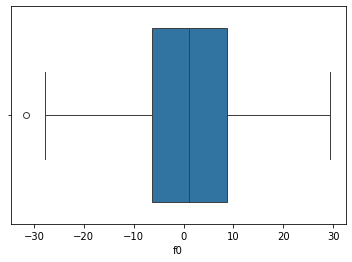

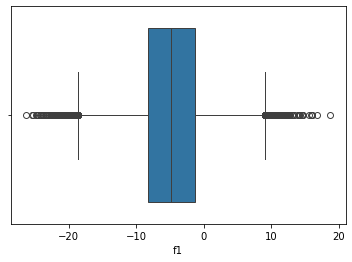

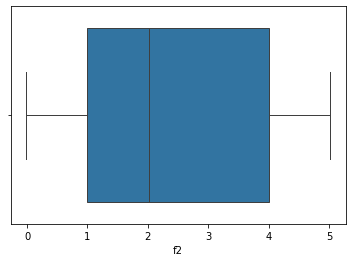

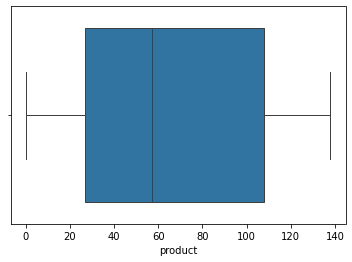

In [17]:
for i in num_col_names:
    sns.boxplot(data=geo_data_1, x=i)
    plt.show()

In [18]:
geo_data_1 = geo_data_1.query('f0> -31')
geo_data_1 = geo_data_1.query('f1 < 18.72')

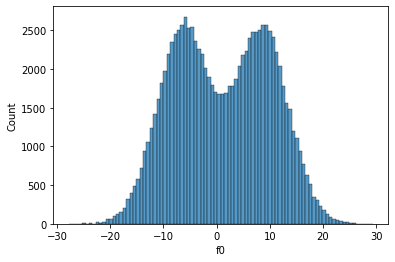

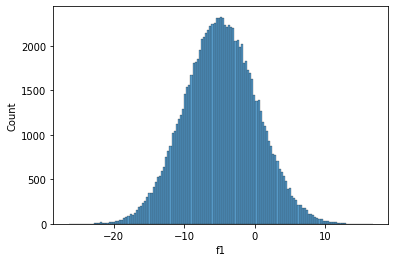

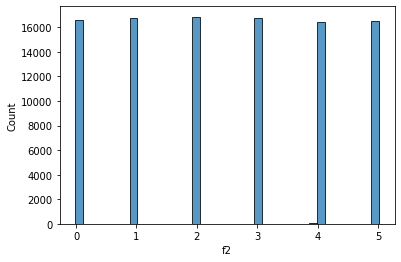

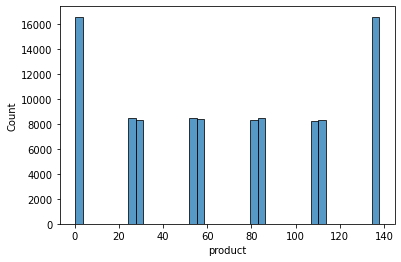

In [19]:
for i in num_col_names:
    sns.histplot(data=geo_data_1, x=i)
    plt.show()

**Промежуточный вывод блока:**

Данные в столбце 'f0'и 'f1' в df geo_data_1 имели выбросы. Данные отфильтрованы

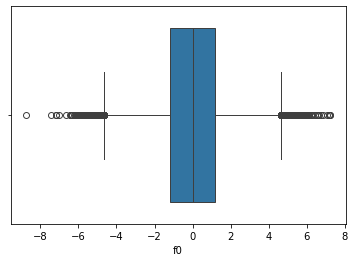

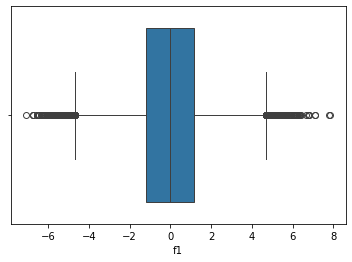

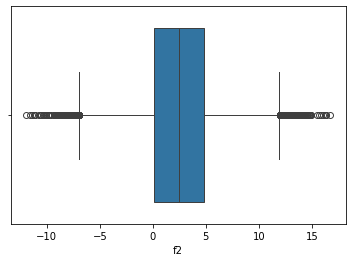

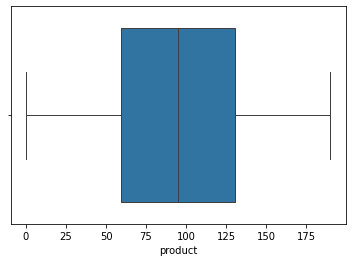

In [20]:
for i in num_col_names:
    sns.boxplot(data=geo_data_2, x=i)
    plt.show()

In [21]:
geo_data_2 = geo_data_2.query('f0> -8')
geo_data_2 = geo_data_2.query('f1 < 7')

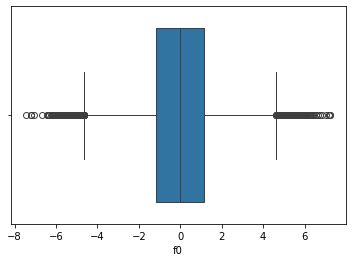

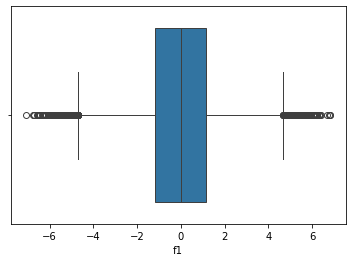

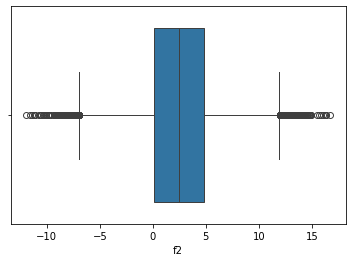

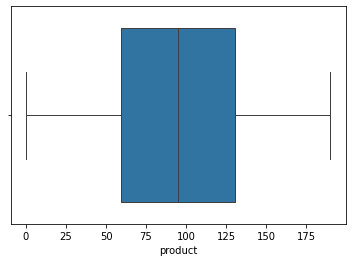

In [22]:
for i in num_col_names:
    sns.boxplot(data=geo_data_2, x=i)
    plt.show()

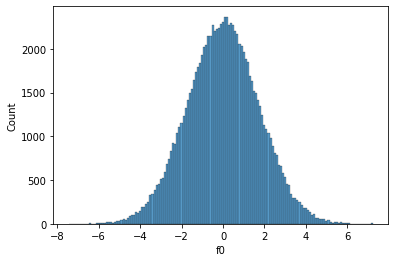

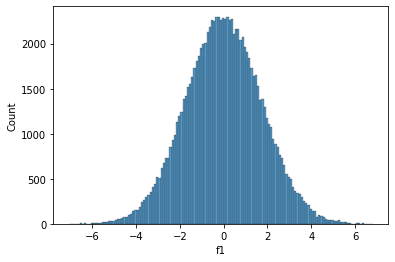

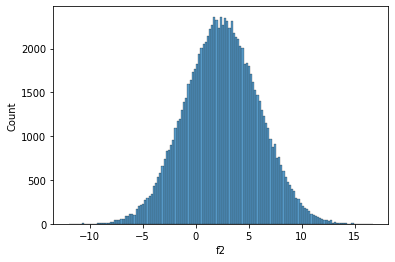

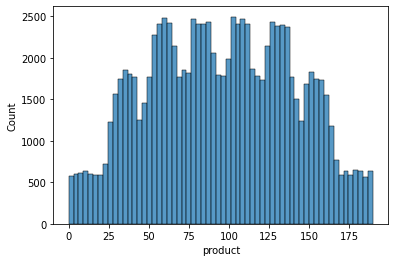

In [23]:
for i in num_col_names:
    sns.histplot(data=geo_data_2, x=i)
    plt.show()

**Промежуточный вывод блока:**

Данные в столбце 'f0'и 'f1' в df geo_data_2 имели выбросы. Данные отфильтрованы

## Обучение и проверка модели

In [24]:
train_geo_0, val_geo_0 = train_test_split(geo_data_0, test_size=0.25, random_state=42) 
#делим данные на тренир. и вал. выборки 75:25 для первого региона

X_train_geo_0 = train_geo_0.drop(['id','product'],axis = 1)
y_train_geo_0 = train_geo_0['product']
#отделяем цел. признак на тренир. выборке для первого региона

X_val_geo_0 = train_geo_0.drop(['id','product'],axis = 1)
y_val_geo_0 = train_geo_0['product']
#отделяем цел. признак на валид. выборке для первого региона



train_geo_1, val_geo_1 = train_test_split(geo_data_1, test_size=0.25, random_state=42)
#делим данные на тренир. и вал. выборки 75:25 для второго региона
X_train_geo_1 = train_geo_1.drop(['id','product'],axis = 1)
y_train_geo_1 = train_geo_1['product']
#отделяем цел. признак на тренир. выборке для второго региона

X_val_geo_1 = train_geo_1.drop(['id','product'],axis = 1)
y_val_geo_1 = train_geo_1['product']
#отделяем цел. признак на валид. выборке для второго региона




train_geo_2, val_geo_2 = train_test_split(geo_data_2, test_size=0.25, random_state=42)
#делим данные на тренир. и вал. выборки 75:25 для третьего региона

X_train_geo_2 = train_geo_2.drop(['id','product'],axis = 1)
y_train_geo_2 = train_geo_2['product']
#отделяем цел. признак на тренир. выборке для третьего региона

X_val_geo_2 = train_geo_2.drop(['id','product'],axis = 1)
y_val_geo_2 = train_geo_2['product']
#отделяем цел. признак на валид. выборке для третьего региона

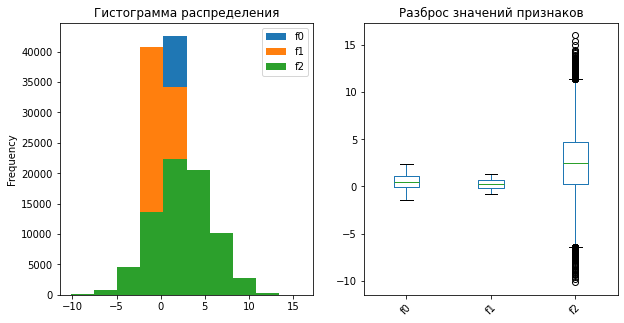

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_geo_0[['f0','f1','f2']].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_geo_0[['f0','f1','f2']].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

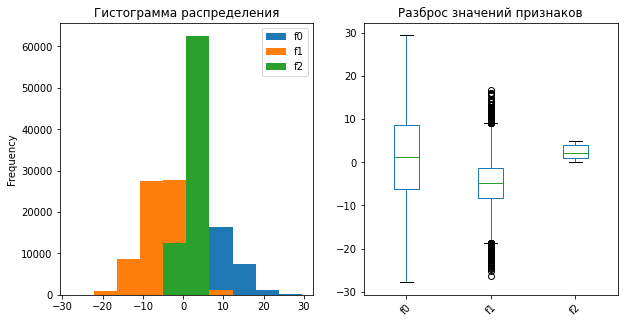

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_geo_1[['f0','f1','f2']].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_geo_1[['f0','f1','f2']].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

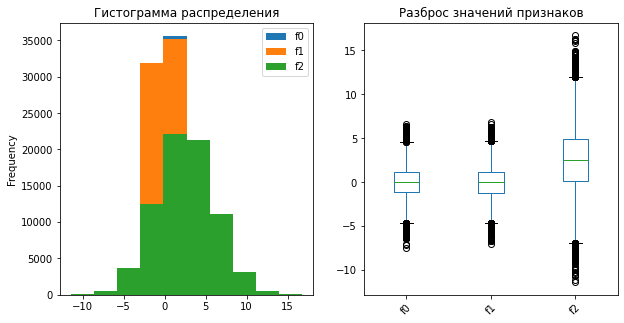

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_geo_2[['f0','f1','f2']].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_geo_2[['f0','f1','f2']].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

**Промежуточный вывод блока:**

* Все df разделены на тренировочные и валидационные выборки в соотношении 75:25

* Я проверил на гистограммах и боксплотах масштаб данных. Исходя из графиков можно предположить, что данные находятся в одном масштабе, что в свою очереде не требует их преобразования.

In [28]:
model_lr= LinearRegression()
model_lr.fit(X_train_geo_0 ,y_train_geo_0)
y_pred_0= model_lr.predict(X_val_geo_0)


In [29]:
y_val_geo_0 = np.array(y_val_geo_0)
mse_0= mean_squared_error(y_val_geo_0, y_pred_0)
rmse_0 = np.sqrt(mse_0)
print(rmse_0)
print(np.mean(y_val_geo_0))

37.66426469831632
92.49252842642964


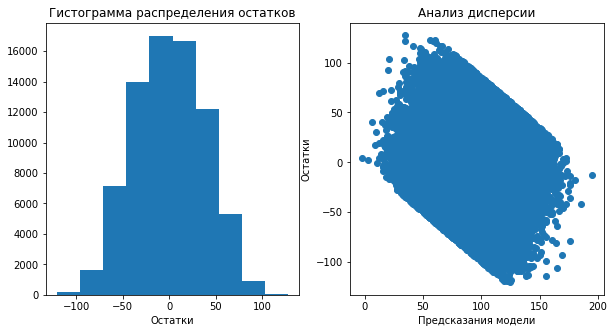

In [30]:
residuals_0 = y_val_geo_0 - y_pred_0


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals_0)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_0,residuals_0)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [31]:

model_lr.fit(X_train_geo_1,y_train_geo_1)
y_pred_1= model_lr.predict(X_val_geo_1)

In [32]:

y_val_geo_1 = np.array(y_val_geo_1)
mse_1= mean_squared_error(y_val_geo_1, y_pred_1)
rmse_1 = np.sqrt(mse_1)
print(rmse_1)
print(np.mean(y_val_geo_1))

0.8902042897840685
68.91811584119986


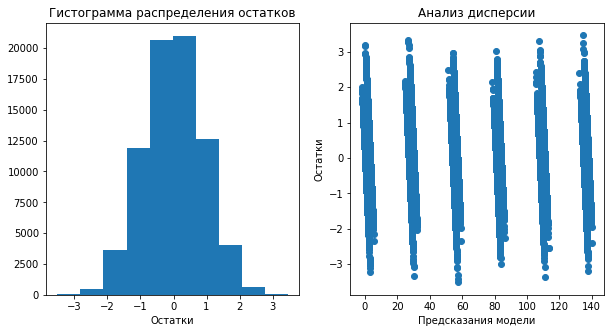

In [33]:
residuals_1 = y_val_geo_1 - y_pred_1


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_1,residuals_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [34]:
model_lr.fit(X_train_geo_2,y_train_geo_2)
y_pred_2= model_lr.predict(X_val_geo_2)

In [35]:
y_val_geo_2 = np.array(y_val_geo_2)
mse_2= mean_squared_error(y_val_geo_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)
print(rmse_2)
print(np.mean(y_val_geo_2))

40.00847719344029
95.10577355514779


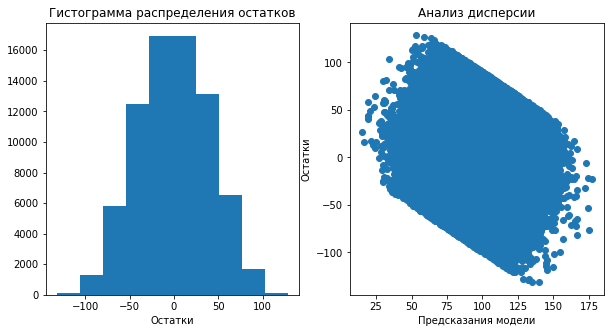

In [36]:
residuals_2 = y_val_geo_2 - y_pred_2


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_2,residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Промежуточный вывод блока:**
1) Гистограммы остатков всех df не показывают смещения и нормально распределяются

2) Слишком хороший показатель у второго df.

3) Анализы дисперсии показывают очень странное поведение, в особенности во втором df. Ощущение, что данные ни в одном из df между собой никак не коррелируют.

Нужно провести корреляционный анализ

### Корреляционный анализ

**Матрица корреляции для первого региона**

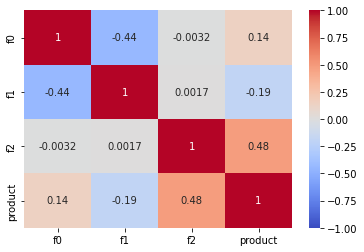

In [37]:
sns.heatmap(geo_data_0.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

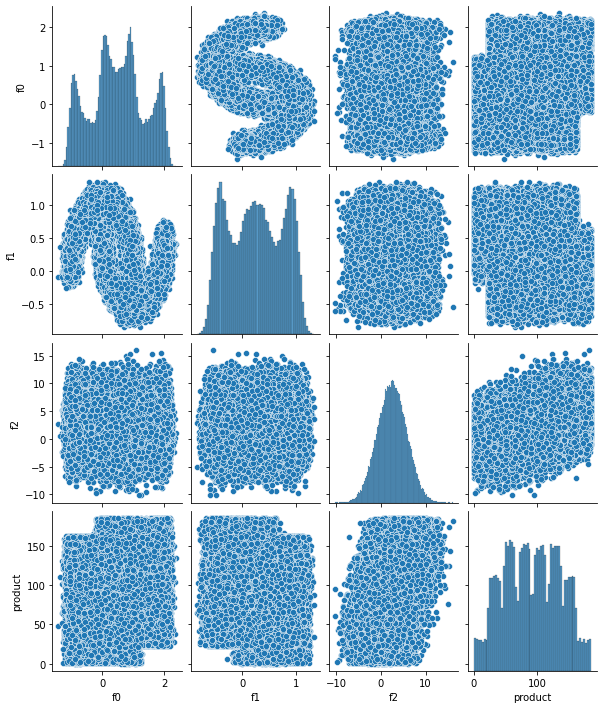

In [38]:
sns.pairplot(
    data=geo_data_0, 
    aspect=.85,
    ); 

**Матрица корреляции для второго региона**

<Axes: >

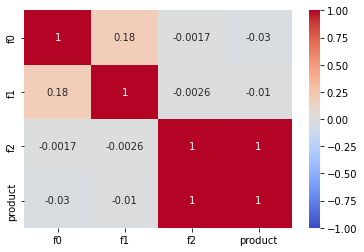

In [39]:
sns.heatmap(geo_data_1.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

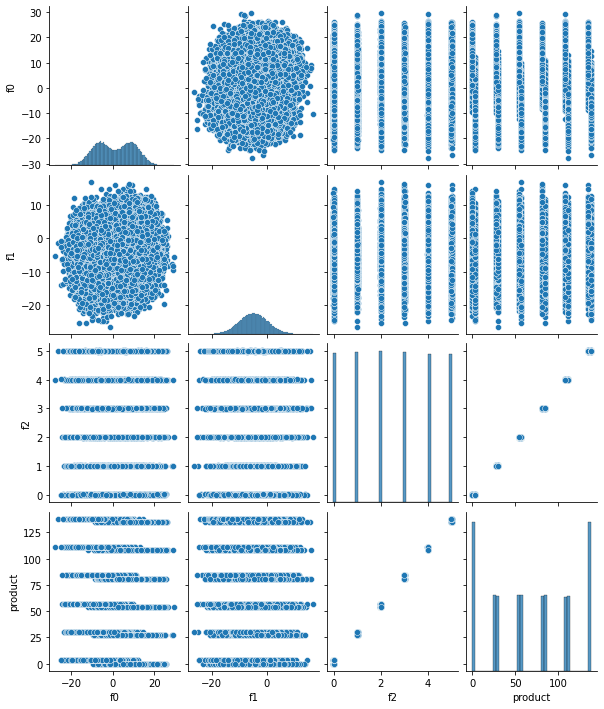

In [40]:
sns.pairplot(
    data=geo_data_1, 
    aspect=.85,
    ); 

**Матрица корреляции для третьего региона**

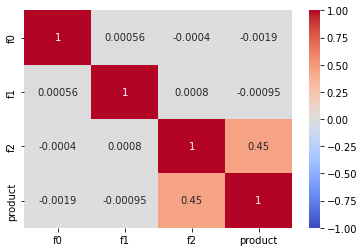

In [41]:
sns.heatmap(geo_data_2.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm');

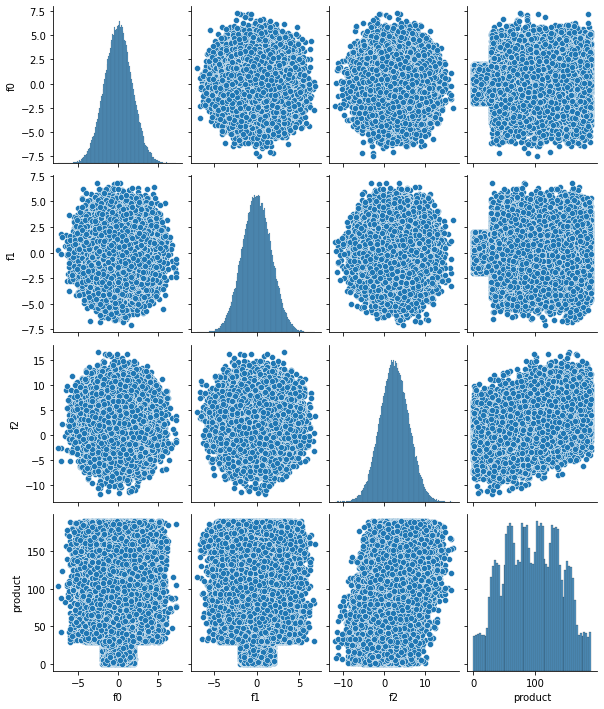

In [42]:
sns.pairplot(
    data=geo_data_2, 
    aspect=.85,
    ); 

**Промежуточный вывод блока**

1) Данные ни одного из региона между собой не взаимосвязаны. Зависимостей нет

2) Во втором регионе на лицо утечка целевого признака. 

3) Исследовательский анализ данных второго региона показал, что f2 и product имеют провалы.


**Решение** 
Обучим еще одну модель, но на этот раз попробуем удалить признак f2 или закодировать его


In [43]:
train_geo_1_1, val_geo_1_1 = train_test_split(geo_data_1, test_size=0.25, random_state=42)
#делим данные на тренир. и вал. выборки 75:25 для второго региона
X_train_geo_1_1 = train_geo_1_1.drop(['id','product','f2'],axis = 1)
y_train_geo_1_1 = train_geo_1_1['product']
#отделяем цел. признак на тренир. выборке для второго региона

X_val_geo_1_1 = train_geo_1_1.drop(['id','product','f2'],axis = 1)
y_val_geo_1_1 = train_geo_1_1['product']

In [44]:
model_lr.fit(X_train_geo_1_1 ,y_train_geo_1_1)
y_pred_1_1= model_lr.predict(X_val_geo_1_1)

In [45]:
y_val_geo_1_1 = np.array(y_val_geo_1_1)
mse_1_1= mean_squared_error(y_val_geo_1_1, y_pred_1_1)
rmse_1_1 = np.sqrt(mse_1_1)
print(rmse_1_1)
print(np.mean(y_val_geo_1_1))

45.93653133804028
68.91811584119986


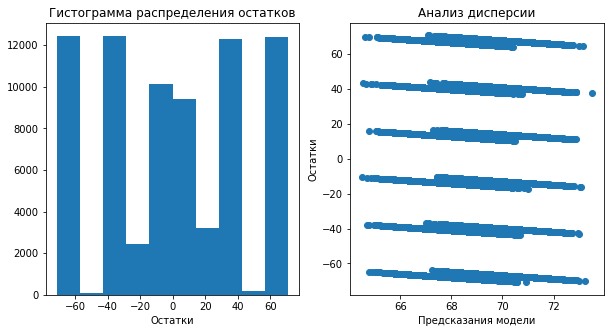

In [46]:
residuals_1_1 = y_val_geo_1_1 - y_pred_1_1


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals_1_1)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_1_1,residuals_1_1)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [47]:
def f2_cat (row):
    if row < 1:
        return 0
    if row < 4:
        return 1
    if row > 4:
        return 2


    return 'другие'
geo_data_1['f2_cat'] = geo_data_1['f2'].apply(f2_cat)



array([[<Axes: title={'center': 'f2_cat'}>]], dtype=object)

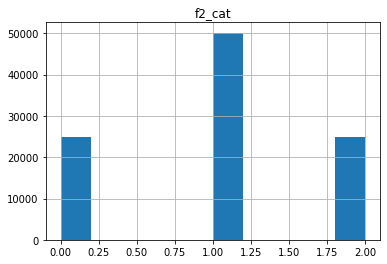

In [48]:
geo_data_1.hist('f2_cat')

In [49]:
train_geo_1_2, val_geo_1_2 = train_test_split(geo_data_1, test_size=0.25, random_state=42)
#делим данные на тренир. и вал. выборки 75:25 для второго региона
X_train_geo_1_2 = train_geo_1_2.drop(['id','product','f2'],axis = 1)
y_train_geo_1_2 = train_geo_1_2['product']
#отделяем цел. признак на тренир. выборке для второго региона

X_val_geo_1_2 = train_geo_1_2.drop(['id','product','f2'],axis = 1)
y_val_geo_1_2 = train_geo_1_2['product']

In [50]:

model_lr.fit(X_train_geo_1_2 ,y_train_geo_1_2)
y_pred_1_2= model_lr.predict(X_val_geo_1_2)

In [51]:
y_val_geo_1_2 = np.array(y_val_geo_1_2)
mse_1_2= mean_squared_error(y_val_geo_1_2, y_pred_1_2)
rmse_1_2 = np.sqrt(mse_1_2)
print(rmse_1_2)
print(np.mean(y_val_geo_1_2))

20.35089751781654
68.91811584119986


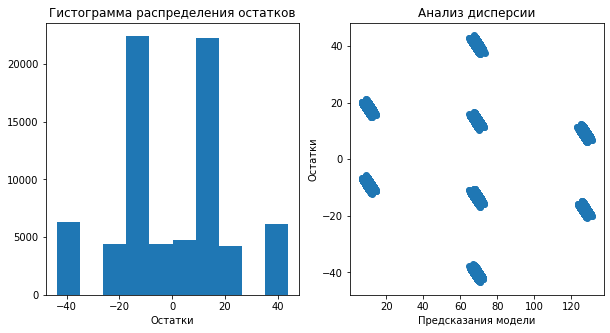

In [52]:
residuals_1_2 = y_val_geo_1_2 - y_pred_1_2


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].hist(residuals_1_2)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(y_pred_1_2,residuals_1_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Общий вывод блока**

Для второго региона я избавился от утечки целевого признака и добавил категоризацию f2.

Дисперсия и распределение остатков не сильно себя улучшили, а только ухудшились. Однако мне удалось избавиться от проблемы переобучения.

Как мне кажется, построить адекватную модель ,в принципе, не предоставляется возможным для всех трех регионов. Данные явно искусственные, хотя в брифе это было указано. Не хватает признаков для поиска взаимосвязи.

## Подготовка к расчёту прибыли

In [53]:
total=10000000000 # общий бюджет для скважин на регион
best_points=200 # количество выбора лучших точек на прогнозе
price_one_point=total/best_points # стоимость для разработки одной скважины
profit_one_barrel=450000 # доход с продажи одной тысячи боррели нефти
enough_volume = price_one_point/profit_one_barrel # достаточный объём сырья для безубыточной разработки новой скважины.

In [54]:
print('Средний запас сырья для первого региона:', np.mean(y_val_geo_0))
print('Средний запас сырья для второго региона:', np.mean(y_val_geo_1))
print('Средний запас сырья для третьего региона:', np.mean(y_val_geo_2))

print('Достаточный объём сырья для безубыточной разработки новой скважины:', enough_volume)

Средний запас сырья для первого региона: 92.49252842642964
Средний запас сырья для второго региона: 68.91811584119986
Средний запас сырья для третьего региона: 95.10577355514779
Достаточный объём сырья для безубыточной разработки новой скважины: 111.11111111111111


**Общий вывод блока**

Для рассчета необходимого объема я сделал последовательный рассчет:
* Общий бюджет делим на количество лучших точек в регионе, тем самым получил стоимость затрат на разработку одной скважины

* Стоимость одной скважины делим на сумму дохода с одной тысячи баррели сырья, что в итоге даст нам необхдимый объем сырья для того, чтобы скважина на считалась убыточной

* Средние показатели сырья для каждого из регионов не достигают необходимого объема. 


## Расчёт прибыли и рисков 

In [55]:
train_geo_0['predict_product'] = y_pred_0
train_geo_1['predict_product']=y_pred_1
# train_geo_1_2['predict_product'] = y_pred_1_2
train_geo_2['predict_product'] = y_pred_2

In [56]:
max_geo_0 = train_geo_0['predict_product'].max()
max_geo_1 = train_geo_1['predict_product'].max()
# max_geo_1_2 = train_geo_1_2['predict_product'].max()
max_geo_2 = train_geo_2['predict_product'].max()

In [57]:
print('Cкважина для первого региона:',train_geo_0.sort_values(by = 'predict_product',ascending = False).max())
print('--------------------------------------------------------------------------------------------------------')
print('Cкважина для второго региона:',train_geo_1.sort_values(by = 'predict_product',ascending = False).max())
print('--------------------------------------------------------------------------------------------------------')
print('Cкважина для третьего региона:',train_geo_2.sort_values(by = 'predict_product',ascending = False).max())

Cкважина для первого региона: id                      zzzzh
f0                   2.362331
f1                   1.334828
f2                   16.00379
product            185.364347
predict_product    195.172636
dtype: object
--------------------------------------------------------------------------------------------------------
Cкважина для второго региона: id                      zzzza
f0                  29.421755
f1                  16.737196
f2                   5.019721
product            137.945408
predict_product    140.355356
dtype: object
--------------------------------------------------------------------------------------------------------
Cкважина для третьего региона: id                      zzz9h
f0                   6.571703
f1                   6.802678
f2                  16.739402
product            190.029838
predict_product    177.266546
dtype: object


#### Создадим функцию для рассчета прибыли:
* Из предсказанного объемы сырья вычтем минимальный, безубыточный объем
* разницу умножим на 450000
* Применим функцию к df трех регионов
* Отсортируем 200 самых прибыльных скважин
* Суммируем предсказанный объем сырья для 200 скважин

In [58]:
pd.set_option('display.float_format', '{:.2f}'.format)
enough_volume  # достаточный объём сырья для безубыточной разработки новой скважины.

111.11111111111111

In [59]:
def profit(value):
    result = (value- enough_volume)* 450000
   
    return result

train_geo_0['profit'] = train_geo_0['predict_product'].apply(profit)
train_geo_1['profit'] = train_geo_1['predict_product'].apply(profit)
# train_geo_1_2['profit'] = train_geo_1_2['predict_product'].apply(profit)
train_geo_2['profit'] = train_geo_2['predict_product'].apply(profit)

#### Выбираем 200 самых прибыльных скважин для каждого региона

In [60]:
max_product_profit_0 = train_geo_0.sort_values(by = 'profit', ascending = False).head(200)
max_product_profit_1 = train_geo_1.sort_values(by = 'profit', ascending = False).head(200)
# max_product_profit_1_2 = train_geo_1_2.sort_values(by = 'profit', ascending = False).head(200)
max_product_profit_2 = train_geo_2.sort_values(by = 'profit', ascending = False).head(200)

In [61]:
total_profit_0 = train_geo_0['profit'].sum() * -1
total_predict_product_0 = train_geo_0['predict_product'].sum() 

total_profit_1= train_geo_1['profit'].sum() * -1
total_predict_product_1 = train_geo_1['predict_product'].sum() 

# total_profit_1_2 = train_geo_1_2['profit'].sum() * -1
# total_predict_product_1_2 = train_geo_1_2['predict_product'].sum() 

total_profit_2 = train_geo_2['profit'].sum() * -1
total_predict_product_2 = train_geo_2['predict_product'].sum() 


In [62]:
if total_profit_0 > total_profit_1:
    print ('Первый регион самый прибыльный')
elif total_profit_1> total_profit_2:
    print ('Второй регион самый прибыльный')
else: print ('Третий регион самый прибыльный')

Второй регион самый прибыльный


**Общий вывод блока:**
* Достаточный объём сырья для безубыточной разработки новой скважины ~ 111

* Второй регион по предсказнному объему сырья принесет максимальную прибыль

### Посчитаем риски и прибыль для каждого региона:

**1) Рассчет распределения прибыли и 95% доверительного интервала для первого региона**

95% доверительный интервал: [-123176936.38, 950514008.36]
Средняя прибыль: 433461727.10
Риск убытка (доля итераций с убытком): 6.00%


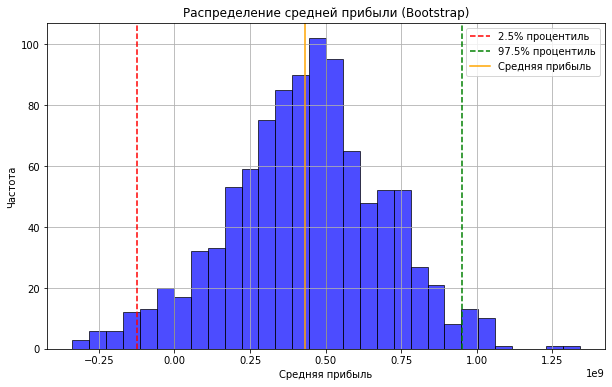

In [64]:

state = RandomState(12345) 
state = np.random.RandomState(12345)
bootstrap_means_0 = []

for i in range(1000):
    id_subsample = train_geo_0.sample(n = 500, replace=True, random_state=state)
    id_subsample = id_subsample.sort_values(by = 'predict_product', ascending = False).head(200)
    id_subsample = (id_subsample['product'].sum() *450000) - (price_one_point * 200)
    
    bootstrap_means_0.append( id_subsample )

lower_bound = np.percentile(bootstrap_means_0, 2.5)
upper_bound = np.percentile(bootstrap_means_0, 97.5)

bootstrap_means_0 = np.array(bootstrap_means_0)
mean_profit = np.mean(bootstrap_means_0)


# Вычисляем риск убытка
risk_of_loss = np.mean(bootstrap_means_0 < 0)  # Доля итераций с убытком

# Выводим результаты
print(f"95% доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Средняя прибыль: {mean_profit:.2f}")
print(f"Риск убытка (доля итераций с убытком): {risk_of_loss:.2%}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_0, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5% процентиль')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5% процентиль')
plt.axvline(mean_profit, color='orange', linestyle='-', label='Средняя прибыль')
plt.title('Распределение средней прибыли (Bootstrap)')
plt.xlabel('Средняя прибыль')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

**2) Рассчет распределения прибыли и 95% доверительного интервала для второго региона**

95% доверительный интервал: [60813681.99, 855799079.45]
Средняя прибыль: 452835159.00
Риск убытка (доля итераций с убытком): 0.90%


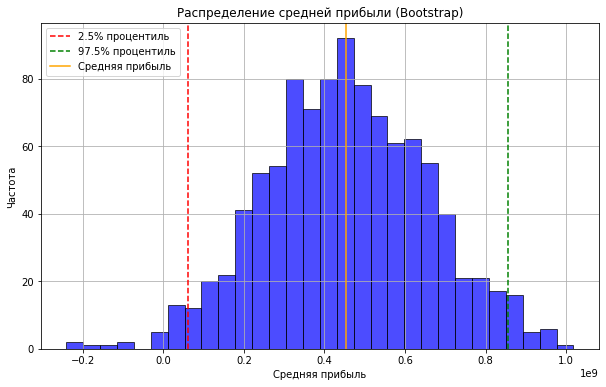

In [65]:

state = RandomState(12345) 
state = np.random.RandomState(12345)
bootstrap_means_1 = []

for i in range(1000):
    id_subsample = train_geo_1.sample(n = 500, replace=True, random_state=state)
    id_subsample = id_subsample.sort_values(by = 'predict_product', ascending = False).head(200)
    id_subsample = (id_subsample['product'].sum() *450000) - (price_one_point * 200)
    
    bootstrap_means_1.append( id_subsample )

lower_bound = np.percentile(bootstrap_means_1, 2.5)
upper_bound = np.percentile(bootstrap_means_1, 97.5)

bootstrap_means_1 = np.array(bootstrap_means_1)
mean_profit = np.mean(bootstrap_means_1)


# Вычисляем риск убытка
risk_of_loss = np.mean(bootstrap_means_1 < 0)  # Доля итераций с убытком

# Выводим результаты
print(f"95% доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Средняя прибыль: {mean_profit:.2f}")
print(f"Риск убытка (доля итераций с убытком): {risk_of_loss:.2%}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_1, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5% процентиль')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5% процентиль')
plt.axvline(mean_profit, color='orange', linestyle='-', label='Средняя прибыль')
plt.title('Распределение средней прибыли (Bootstrap)')
plt.xlabel('Средняя прибыль')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

**3) Рассчет распределения прибыли и 95% доверительного интервала для третьего региона**

95% доверительный интервал: [-177986937.61, 923338757.12]
Средняя прибыль: 391605489.54
Риск убытка (доля итераций с убытком): 7.10%


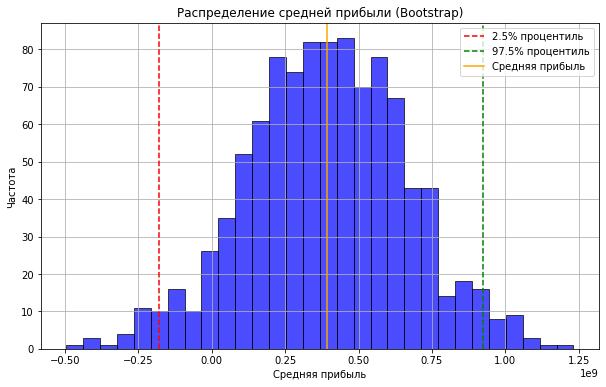

In [66]:
state = RandomState(12345) 
state = np.random.RandomState(12345)
bootstrap_means_2 = []

for i in range(1000):
    id_subsample = train_geo_2.sample(n = 500, replace=True, random_state=state)
    id_subsample = id_subsample.sort_values(by = 'predict_product', ascending = False).head(200)
    id_subsample = (id_subsample['product'].sum() *450000) - (price_one_point * 200)
    
    bootstrap_means_2.append( id_subsample )

lower_bound = np.percentile(bootstrap_means_2, 2.5)
upper_bound = np.percentile(bootstrap_means_2, 97.5)

bootstrap_means_2 = np.array(bootstrap_means_2)
mean_profit = np.mean(bootstrap_means_2)


# Вычисляем риск убытка
risk_of_loss = np.mean(bootstrap_means_2 < 0)  # Доля итераций с убытком

# Выводим результаты
print(f"95% доверительный интервал: [{lower_bound:.2f}, {upper_bound:.2f}]")
print(f"Средняя прибыль: {mean_profit:.2f}")
print(f"Риск убытка (доля итераций с убытком): {risk_of_loss:.2%}")

# Визуализация
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_2, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label='2.5% процентиль')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5% процентиль')
plt.axvline(mean_profit, color='orange', linestyle='-', label='Средняя прибыль')
plt.title('Распределение средней прибыли (Bootstrap)')
plt.xlabel('Средняя прибыль')
plt.ylabel('Частота')
plt.legend()
plt.grid()
plt.show()

#### Общий вывод

**Процесс работы:**

* 1) Была осуществлена предобработка данных

* 2) Проведен исследовательский анализ данных. Удалены выбросы

* 3) Данные были поделены на выборки. Построена модель. Построена матрица корреляции для каждого региона

* 4) Были попытки улучшить модель для второго регоина. Изначально она имела свойства переобучения. После категоризации признаков модель показала более адекватные результаты. Согласно метрике RMSE. Однако я оставил в рассчеты модель без изменений, так как для данные для каждого региона должны быть в одинаковой среде, без изменений

* 5) Найдено минимальное количество баррелей для безубыточной работы. Произведен расчет прибыли предскзанного сырья для каждого региона

* 6) Методом бутстрап найдено ср. распределение прибыли с 95% доверительным интервалом для каждого региона.

На основании предсказанного сырья, которое было получено с помощью модели линейной регрессии был произведен рассчет прибыли. Минимальное количество сырья для безубыточной работы в скважине мы должны получать не менее 111 тыс баррелей. Для каждой скважины каждого региона был произведен рассчет прибыли. Согласно расчетам, второй регион оказался самым прибыльным.

После расчетов распределения средней прибыли каждого региона, можно предположить, что наименее рисковым регионом будет второй регион. Его средняя прибыль показала более лучшие результаты. Доверительный интервал не принимает отрицательные значения, а также имеет наименьшую долю риска убытков

На основании тех данных, которые есть, компании стоит выбрать второй регион для работы и добычи сырья. Если риски для компании слишком большие, может быть стоит подумать над тем, чтобы подпитать данные новой информацией, что в конечном результате улучшит предсказания и увеличит(или уменьшит) прибыль